In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
vector1 = np.array([2, 3, 4, 6, 8, 7, 6, 5, 4, 3, 2])
vector2 = np.array([2, 4, 6, 7, 7, 6, 5, 5, 4, 3, 2, 2, 1])


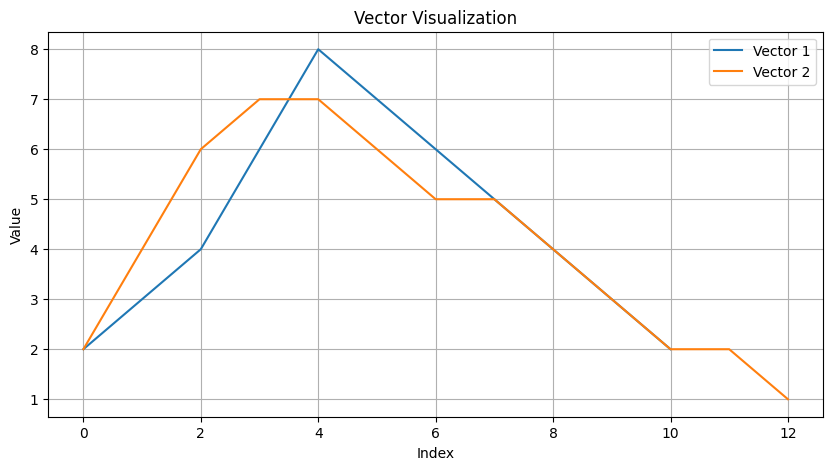

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(vector1, label='Vector 1')
plt.plot(vector2, label='Vector 2')
plt.title("Vector Visualization")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
def dtw(v1, v2):
    len1, len2 = len(v1), len(v2)
    cost_matrix = np.full((len1 + 1, len2 + 1), np.inf)
    cost_matrix[0, 0] = 0

    for i in range(1, len1 + 1):
        for j in range(1, len2 + 1):
            cost = abs(v1[i - 1] - v2[j - 1])
            cost_matrix[i, j] = cost + min(cost_matrix[i - 1, j], 
                                           cost_matrix[i, j - 1], 
                                           cost_matrix[i - 1, j - 1])
    
    i, j = len1, len2
    path = []
    while i > 0 and j > 0:
        path.append((i - 1, j - 1))
        if cost_matrix[i - 1, j] == min(cost_matrix[i - 1, j], 
                                    cost_matrix[i, j - 1], 
                                    cost_matrix[i - 1, j - 1]):
            i -= 1
        elif cost_matrix[i, j - 1] == min(cost_matrix[i - 1, j], 
                                          cost_matrix[i, j - 1],
                                          cost_matrix[i - 1, j - 1]):
            j -= 1
        else:
            i -= 1
            j -= 1

    path.reverse()
    return cost_matrix[1:, 1:], path, cost_matrix[len1, len2]

In [8]:
cost_matrix, warping_path, dtw_distance = dtw(vector1, vector2)

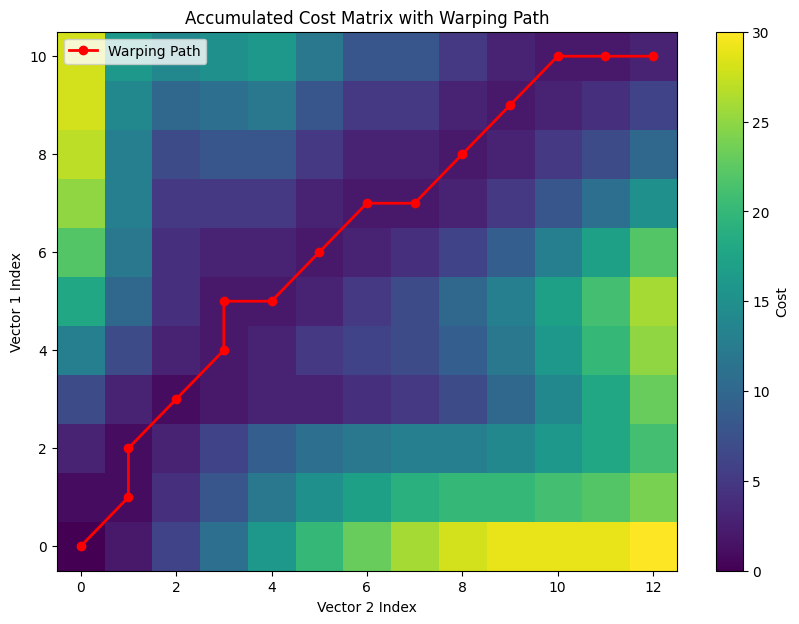

In [24]:
plt.figure(figsize=(10, 7))
plt.imshow(cost_matrix, origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label='Cost')
plt.title('Accumulated Cost Matrix with Warping Path')
plt.xlabel('Vector 2 Index')
plt.ylabel('Vector 1 Index')

# Plot the warping path directly
path_x, path_y = zip(*warping_path)
plt.plot(path_y, path_x, marker='o', color='red', label='Warping Path', linewidth=2)

# Add legend and grid
plt.legend()

# Display the plot
plt.show()
